In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from Utils.univariate_featureSelection import featureSelectionResults, get_selectedFeatures
from Utils.setupDataset import get_dataset, combine_datasets
from Utils.feature_vector import get_feature_names
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics as skmetrics
from Utils.selection_metrics import SelectionMetrics
import pandas as pd
from Utils.lasso_selections import get_LassoSelectionResults
from sklearn import preprocessing

fnames = get_feature_names()

m_dev = get_dataset("Datasets/M_DEV_dataset.pickle")
w_dev = get_dataset("Datasets/W_DEV_dataset.pickle")
m_val = get_dataset("Datasets/M_VAL_dataset.pickle")
w_val = get_dataset("Datasets/W_VAL_dataset.pickle")

m_filename = 'Datasets/M_SELECTIONS_univariate.csv'
w_filename = 'Datasets/W_SELECTIONS_univariate.csv'


m_rfe = 'Datasets/M_SELECTIONS_RFE.csv'
w_rfe = 'Datasets/W_SELECTIONS_RFE.csv'

m_sel_lasso = "Datasets/M_SELECTIONS_lasso.pickle"
w_sel_lasso = "Datasets/W_SELECTIONS_lasso.pickle"



def get_stepwise_results(dev, val, rankfile, rfe_file):
    
    scaler = preprocessing.StandardScaler().fit(dev["data"])
    X = scaler.transform(dev["data"])
    X_test = scaler.transform(val["data"])
        
    dev["data"] = X
    val["data"] = X_test
    
    dfs = []
    for i in range(1, 69):
        results = featureSelectionResults(dev, val, rankfile, rfe_file, i)
        df = results.data_frame()
        dfs.append(df)
    return dfs



def get_stepwise_scores(dfs, scorename='f1', start=1, end=69):
    noselection = []
    RFE = []
    combined= []
    chi = []
    mi = []
    ranksum = []
    ftest = []

    for df in dfs[start:end]:
        noselection.append(df[scorename]['no selection'])
        RFE.append(df[scorename]['RFE'])
        combined.append(df[scorename]['combined'])
        ftest.append(df[scorename]['f-test'])
        ranksum.append(df[scorename]['ranksum'])
        chi.append(df[scorename]['chi2'])
        mi.append(df[scorename]['mi'])
    
    return noselection, RFE, combined, ftest, ranksum, chi, mi


def get_logReg_featureSelectionResults(univariate_dfs, lasso_df, out="Datasets/MODEL_LR_results.csv"):
    source_label = ["no selection (L1)", "f-test", "ranksum", "chi2", "mi", "combined", "RFE"]
    df0 = univariate_dfs[0]
    df0['source'] = source_label
    results = [df0]
    
    for df in univariate_dfs[1:]:
        df['source'] = source_label
        results.append(df[1:]) # do not add 'no selection' here (repeatedly)
        
    results.append(lasso_df)

    appended_results = pd.concat(results, axis=0)
    appended_results = appended_results.sort_values('f1', ascending=False)
    appended_results.index = range(len(appended_results))

    # save results in cvs
    appended_results.to_csv(out, sep='\t')
    return appended_results


def plot_stepwise_scores(noselection, RFE, combined, ftest, ranksum, chi, mi, start=0, end=68, title="my dataset", scorename='f1 score'):
    if end > len(noselection):
        end = len(noselection)
    x_axis = np.arange(start, end)

    plt.plot(x_axis,noselection[start:end], color="red", linewidth=3, linestyle="-", label="no selection")
    plt.plot(x_axis,RFE[start:end], color="green", linewidth=2, linestyle="-", label="RFE") 
    plt.plot(x_axis,ftest[start:end], color="blue", linewidth=2, linestyle="-", label="f-test") 
    plt.plot(x_axis,ranksum[start:end], color="pink", linewidth=2, linestyle="-", label="ranksum") 
    plt.plot(x_axis,chi[start:end], color="orange", linewidth=2, linestyle="-", label="chi2") 
    plt.plot(x_axis,mi[start:end], color="#98df8a", linewidth=2, linestyle="-", label="mi") 
    plt.plot(x_axis,combined[start:end], color="#aec7e8", linewidth=2, linestyle="-", label="combined") 
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.suptitle(title)
    plt.xlabel('n Features')
    plt.ylabel(scorename)
    plt.show()
    


In [6]:
mlasso = get_LassoSelectionResults(m_dev, m_val, m_sel_lasso)
wlasso = get_LassoSelectionResults(w_dev, w_val, w_sel_lasso)

In [8]:
df_loaded = pd.read_csv("Datasets/M_MODEL_LR_results.csv", sep='\t', index_col=0)
df_loaded

,f1,precision,recall,accuracy,TN,FP,FN,TP,n,selection,source
0,0.823529,0.826772,0.820312,0.825581,108,22,23,105,24,"[1, 43, 10, 11, 40, 26, 59, 35, 56, 24, 60, 62...",f-test
1,0.823529,0.826772,0.820312,0.825581,108,22,23,105,22,"[1, 43, 10, 11, 40, 26, 59, 35, 56, 24, 60, 62...",f-test
2,0.823529,0.826772,0.820312,0.825581,108,22,23,105,23,"[1, 43, 10, 11, 40, 26, 59, 35, 56, 24, 60, 62...",f-test
3,0.821705,0.815385,0.828125,0.821705,106,24,22,106,18,"[43, 1, 10, 62, 60, 40, 35, 19, 24, 26, 56, 12...",mi
4,0.820717,0.837398,0.804688,0.825581,110,20,25,103,20,"[1, 43, 10, 11, 40, 26, 59, 35, 56, 24, 60, 62...",f-test
5,0.816327,0.854701,0.781250,0.825581,113,17,28,100,14,"[43, 1, 10, 62, 60, 40, 35, 19, 24, 26, 56, 12...",mi
6,0.816327,0.854701,0.781250,0.825581,113,17,28,100,14,"[43, 1, 10, 40, 19, 18, 56, 12, 26, 20, 59, 60...",combined
7,0.816327,0.854701,0.781250,0.825581,113,17,28,100,15,"[43, 1, 10, 40, 19, 18, 56, 12, 26, 20, 59, 60...",combined
8,0.816000,0.836066,0.796875,0.821705,110,20,26,102,24,"[1, 43, 10, 11, 26, 59, 35, 19, 12, 18, 20, 24...",ranksum
9,0.816000,0.836066,0.796875,0.821705,110,20,26,102,21,"[1, 43, 10, 11, 40, 26, 59, 35, 56, 24, 60, 62...",f-test


In [9]:
mlasso

,f1,precision,recall,accuracy,TN,FP,FN,TP,n,selection,source
0,0.786260,0.768657,0.804688,0.782946,99,31,25,103,68,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",no selection
1,0.449704,0.926829,0.296875,0.639535,127,3,90,38,1,[40],Lasso
2,0.615385,0.800000,0.500000,0.689922,114,16,64,64,2,"[0, 40]",Lasso
3,0.601942,0.794872,0.484375,0.682171,114,16,66,62,3,"[0, 14, 40]",Lasso
4,0.601942,0.794872,0.484375,0.682171,114,16,66,62,5,"[0, 5, 14, 37, 40]",Lasso
5,0.607477,0.755814,0.507812,0.674419,109,21,63,65,7,"[0, 5, 14, 37, 40, 42, 45]",Lasso
6,0.599078,0.730337,0.507812,0.662791,106,24,63,65,8,"[0, 5, 14, 37, 40, 42, 44, 45]",Lasso
7,0.611872,0.736264,0.523438,0.670543,106,24,61,67,9,"[0, 5, 14, 37, 38, 40, 42, 44, 45]",Lasso
8,0.628319,0.724490,0.554688,0.674419,103,27,57,71,11,"[0, 5, 14, 33, 37, 38, 40, 42, 44, 45, 54]",Lasso
9,0.762646,0.759690,0.765625,0.763566,99,31,30,98,16,"[0, 1, 2, 5, 8, 14, 33, 37, 38, 40, 41, 42, 44...",Lasso


In [4]:
wlasso

,f1,precision,recall,accuracy,TN,FP,FN,TP,n,selection,source
0,0.834675,0.910811,0.770286,0.847079,805,66,201,674,68,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",no selection
1,0.711784,0.607431,0.859429,0.651203,385,486,123,752,1,[7],Lasso
2,0.809756,0.867974,0.758857,0.821306,770,101,211,664,13,"[1, 7, 8, 9, 16, 18, 21, 34, 37, 40, 43, 46, 55]",Lasso


# my dataset

In [4]:
dfs = get_stepwise_results(m_dev, m_val, m_filename, m_rfe)

In [7]:
hey = get_logReg_featureSelectionResults(dfs, mlasso, out="Datasets/M_MODEL_LR_results.csv")
pd.set_option('display.max_rows', len(hey))
hey

,f1,precision,recall,accuracy,TN,FP,FN,TP,n,selection,source
0,0.823529,0.826772,0.820312,0.825581,108,22,23,105,24,"[1, 43, 10, 11, 40, 26, 59, 35, 56, 24, 60, 62...",f-test
1,0.823529,0.826772,0.820312,0.825581,108,22,23,105,22,"[1, 43, 10, 11, 40, 26, 59, 35, 56, 24, 60, 62...",f-test
2,0.823529,0.826772,0.820312,0.825581,108,22,23,105,23,"[1, 43, 10, 11, 40, 26, 59, 35, 56, 24, 60, 62...",f-test
3,0.821705,0.815385,0.828125,0.821705,106,24,22,106,18,"[43, 1, 10, 62, 60, 40, 35, 19, 24, 26, 56, 12...",mi
4,0.820717,0.837398,0.804688,0.825581,110,20,25,103,20,"[1, 43, 10, 11, 40, 26, 59, 35, 56, 24, 60, 62...",f-test
5,0.816327,0.854701,0.781250,0.825581,113,17,28,100,14,"[43, 1, 10, 62, 60, 40, 35, 19, 24, 26, 56, 12...",mi
6,0.816327,0.854701,0.781250,0.825581,113,17,28,100,14,"[43, 1, 10, 40, 19, 18, 56, 12, 26, 20, 59, 60...",combined
7,0.816327,0.854701,0.781250,0.825581,113,17,28,100,15,"[43, 1, 10, 40, 19, 18, 56, 12, 26, 20, 59, 60...",combined
8,0.816000,0.836066,0.796875,0.821705,110,20,26,102,24,"[1, 43, 10, 11, 26, 59, 35, 19, 12, 18, 20, 24...",ranksum
9,0.816000,0.836066,0.796875,0.821705,110,20,26,102,21,"[1, 43, 10, 11, 40, 26, 59, 35, 56, 24, 60, 62...",f-test


In [18]:
hey['selection'][1].values

array([43, 1, 10, 40, 19, 18, 56, 12, 26, 20, 59, 60, 35, 24, 61, 54, 62,
       11, 2, 8, 42, 52, 46, 34, 16, 53, 23, 0, 47, 55, 9, 33, 4, 49, 63,
       45, 32, 7, 3, 50], dtype=object)

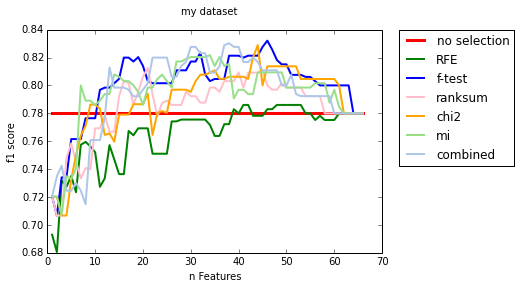

In [4]:
noselection, RFE, combined, ftest, ranksum, chi, mi = get_stepwise_scores(dfs, scorename='f1')
plot_stepwise_scores(noselection, RFE, combined, ftest, ranksum, chi, mi, start=1, end=68)

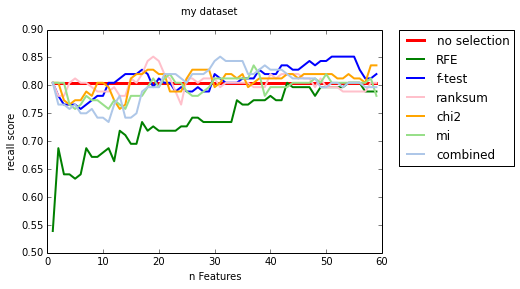

In [5]:
noselection, RFE, combined, ftest, ranksum, chi, mi = get_stepwise_scores(dfs, scorename='recall')
plot_stepwise_scores(noselection, RFE, combined, ftest, ranksum, chi, mi, start=1, end=60, scorename='recall score')

# wiki dataset

In [6]:
w_dfs = get_stepwise_results(w_dev, w_val, w_filename, w_rfe)

In [2]:
w_dfs = get_stepwise_results(w_dev, w_val, w_filename, w_rfe)

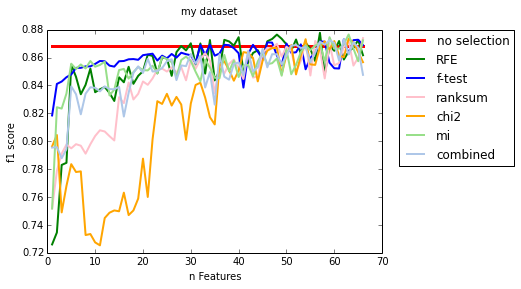

In [3]:
noselection, RFE, combined, ftest, ranksum, chi, mi = get_stepwise_scores(w_dfs, scorename='f1')
plot_stepwise_scores(noselection, RFE, combined, ftest, ranksum, chi, mi, start=1, end=68)

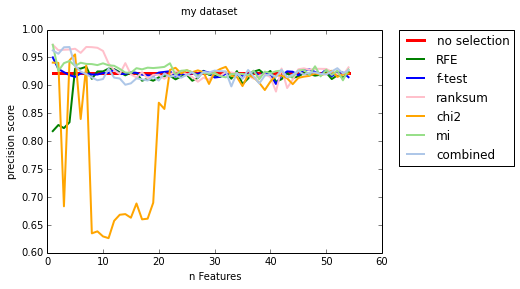

In [4]:
noselection, RFE, combined, ftest, ranksum, chi, mi = get_stepwise_scores(w_dfs, scorename='precision')
plot_stepwise_scores(noselection, RFE, combined, ftest, ranksum, chi, mi, start=1, end=55, scorename='precision score')

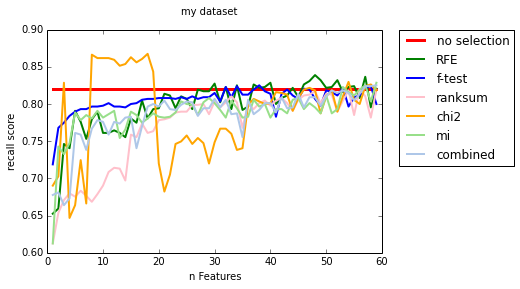

In [5]:
noselection, RFE, combined, ftest, ranksum, chi, mi = get_stepwise_scores(w_dfs, scorename='recall')
plot_stepwise_scores(noselection, RFE, combined, ftest, ranksum, chi, mi, start=1, end=60, scorename='recall score')

In [ ]:


#m_dev = get_dataset("Datasets/M_DEV_dataset.pickle")
#w_dev = get_dataset("Datasets/W_DEV_dataset.pickle")
#m_val = get_dataset("Datasets/M_VAL_dataset.pickle")
#w_val = get_dataset("Datasets/W_VAL_dataset.pickle")

dfs = get_stepwise_results(m_dev, m_val, m_filename, m_rfe)